In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

## Load dataset

In [175]:
#df = pd.read_csv("dataset/V2_PlatteRiverWeir_features_merged_all.csv")
df = pd.read_csv("dataset/Seresnet_101_V1_PlatteRiverWeir_features_merged_all.csv")
df.head()

Unnamed: 0.1  Unnamed: 0           SensorTime          CaptureTime  \
0             0           0  2012-06-09 13:15:00  2012-06-09T13:09:07   
1             1           1  2012-06-09 13:15:00  2012-06-09T13:10:29   
2             2           2  2012-06-09 13:45:00  2012-06-09T13:44:01   
3             3           3  2012-06-09 14:45:00  2012-06-09T14:44:30   
4             4           4  2012-06-09 15:45:00  2012-06-09T15:44:59   

                                 Filename Agency  SiteNumber TimeZone  Stage  \
0  StateLineWeir_20120609_Farrell_001.jpg   USGS     6674500      MDT   2.99   
1  StateLineWeir_20120609_Farrell_002.jpg   USGS     6674500      MDT   2.99   
2  StateLineWeir_20120609_Farrell_003.jpg   USGS     6674500      MDT   2.96   
3  StateLineWeir_20120609_Farrell_004.jpg   USGS     6674500      MDT   2.94   
4  StateLineWeir_20120609_Farrell_005.jpg   USGS     6674500      MDT   2.94   

   Discharge  ... WwRawLineMax  WwRawLineMean  WwRawLineSigma  WwCurveLineMin  \
0      916.0  ...          0.0            0.0             0.0             0.0   
1      916.0  ...          0.0            0.0             0.0             0.0   
2      873.0  ...          0.0            0.0             0.0             0.0   
3      846.0  ...          0.0            0.0             0.0             0.0   
4      846.0  ...          0.0            0.0             0.0             0.0   

   WwCurveLineMax  WwCurveLineMean  WwCurveLineSigma  RiverArea  RiverWidth  \
0             0.0              0.0               0.0    48600.0  206.869518   
1             0.0              0.0               0.0    48672.0  207.783958   
2             0.0              0.0               0.0    48789.0  208.999388   
3             0.0              0.0               0.0    49458.0  214.496309   
4             0.0              0.0               0.0    49719.0  214.436293   

                            FilenameLower  
0  statelineweir_20120609_farrell_001.jpg  
1  statelineweir_20120609_farrell_002.jpg  
2  statelineweir_20120609_farrell_003.jpg  
3  statelineweir_20120609_farrell_004.jpg  
4  statelineweir_20120609_farrell_005.jpg  

[5 rows x 64 columns]

In [176]:
df['SensorTime'] = pd.to_datetime(df['SensorTime'])
df['CaptureTime'] = pd.to_datetime(df['CaptureTime'])

In [177]:
df = df.sort_values(by="CaptureTime", ascending=True)

In [178]:
df["Month"] = df['CaptureTime'].dt.month

### Get area, time and the values we want to predict

In [179]:
df_m = df[["Stage", "Discharge", "Month", "RiverArea", "RiverWidth"]]
df_m

Stage  Discharge  Month  RiverArea  RiverWidth
0       2.99      916.0      6    48600.0  206.869518
1       2.99      916.0      6    48672.0  207.783958
2       2.96      873.0      6    48789.0  208.999388
3       2.94      846.0      6    49458.0  214.496309
4       2.94      846.0      6    49719.0  214.436293
...      ...        ...    ...        ...         ...
42054   2.54      434.0     10    41501.0  177.634092
42055   2.54      434.0     10    41591.0  184.552444
42056   2.54      434.0     10    41949.0  194.668612
42057   2.54      434.0     10    42822.0  186.753722
42058   2.54      434.0     10    43076.0  189.701814

[42059 rows x 5 columns]

In [180]:
df_m.describe()

Stage     Discharge         Month     RiverArea    RiverWidth
count  42059.000000  42059.000000  42059.000000  42059.000000  42059.000000
mean       2.878743    970.956439      6.590432  39648.649160    171.297762
std        0.805533   1192.272290      3.143760   7042.836984     28.273500
min        0.000000      0.000000      1.000000      0.000000      0.000000
25%        2.280000    213.000000      4.000000  37475.500000    162.101500
50%        2.550000    388.000000      7.000000  40268.000000    177.322306
75%        3.290000   1350.000000      9.000000  43177.500000    187.040372
max        6.490000   7920.000000     12.000000  69046.000000    298.023401

## Study dataset

### Study all

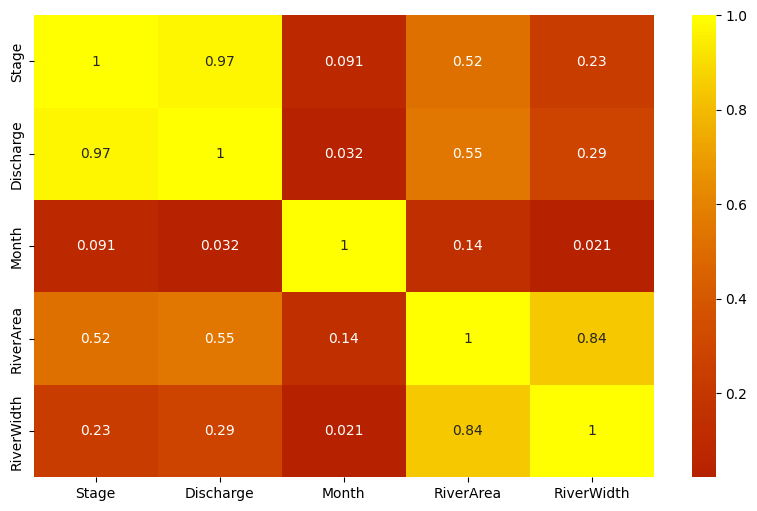

In [181]:
corr_pearson = df_m.corr() # pearson correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_pearson, annot=True, center=0, cmap='gnuplot')
plt.show()

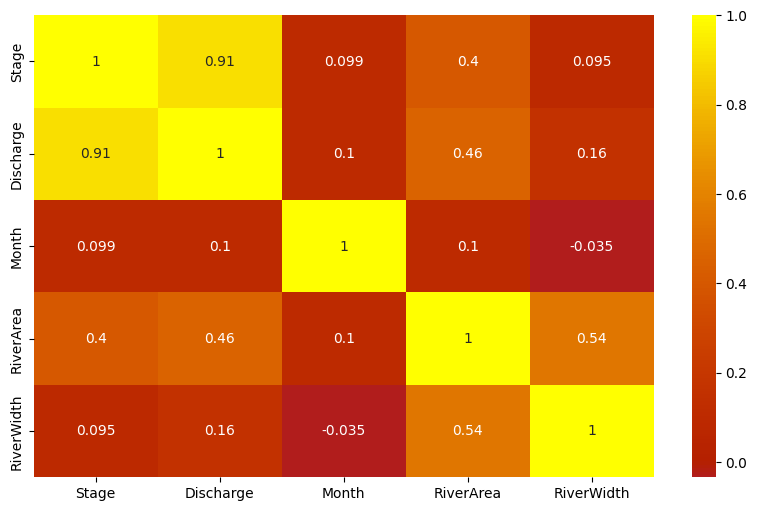

In [182]:
corr_ken = df_m.corr(method="kendall") # kendall correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_ken, annot=True, center=0, cmap='gnuplot')
plt.show()

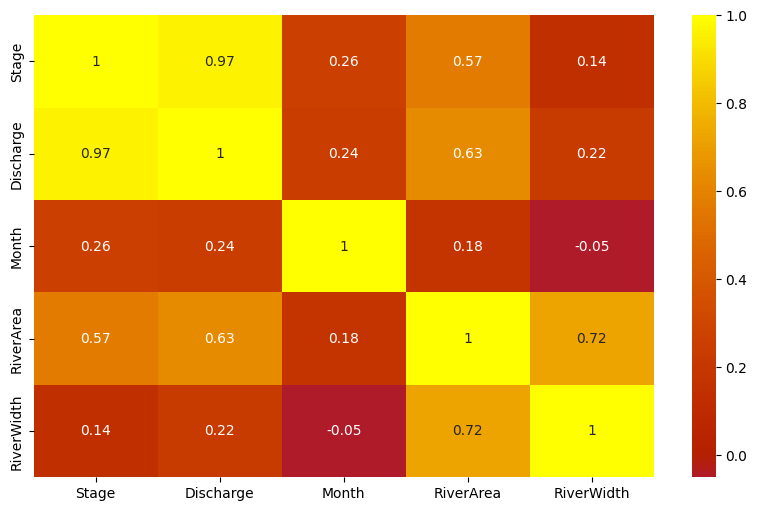

In [183]:
corr_spearman = df_m.corr(method="spearman") # spearman correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman, annot=True, center=0, cmap='gnuplot')
plt.show()

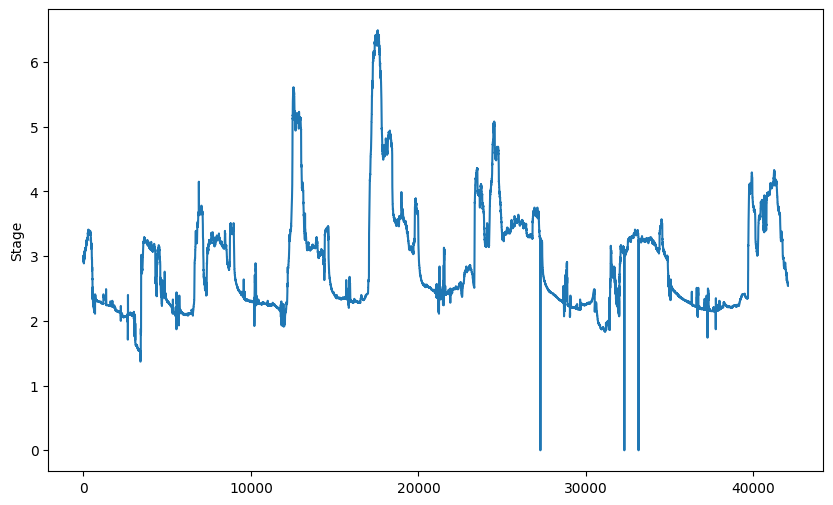

In [184]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_m, x=np.arange(df_m.shape[0]), y="Stage")

plt.show()

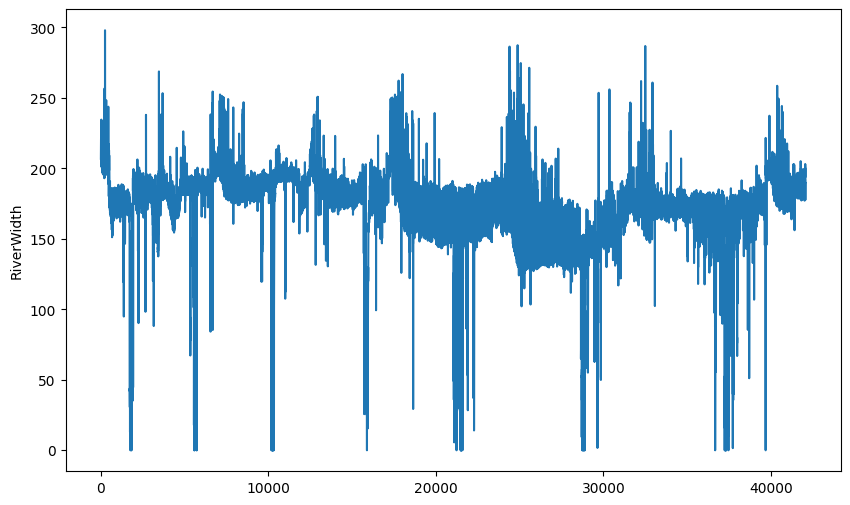

In [185]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_m, x=np.arange(df_m.shape[0]), y="RiverWidth")

plt.show()

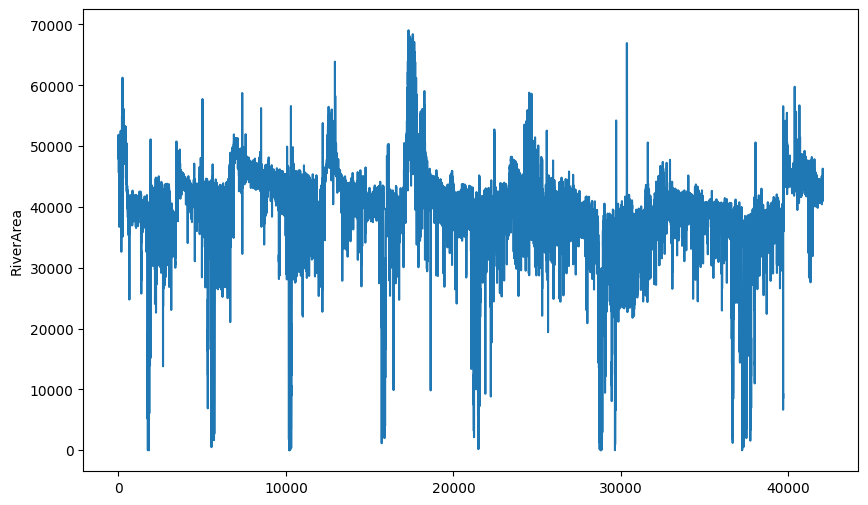

In [186]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_m, x=np.arange(df_m.shape[0]), y="RiverArea")

plt.show()

#### Check outliers

In [187]:
#df_outliers = df[df.RiverArea < 30000]
df_outliers = df[df.RiverWidth < 150]
df_outliers = df_outliers[["Stage", "Discharge", "Month", "RiverArea", "RiverWidth", "Filename"]]
df_outliers.head()

Stage  Discharge  Month  RiverArea  RiverWidth  \
1352   2.25        0.0     12    30668.0  119.282684   
1353   2.25        0.0     12    30626.0  119.708444   
1354   2.25        0.0     12    31100.0  121.517406   
1364   2.25        0.0     12    27930.0  130.081710   
1369   2.25        0.0     12    25760.0   94.909126   

                                    Filename  
1352  StateLineWeir_20121209_Farrell_277.JPG  
1353  StateLineWeir_20121209_Farrell_278.JPG  
1354  StateLineWeir_20121209_Farrell_279.JPG  
1364  StateLineWeir_20121210_Farrell_289.JPG  
1369  StateLineWeir_20121210_Farrell_294.JPG

In [188]:
df_outliers.shape

(5924, 6)

In [189]:
path_images = "./dataset/images/"
path_masks = "./dataset/dataset_seg_masks_seresnet_101_1/"

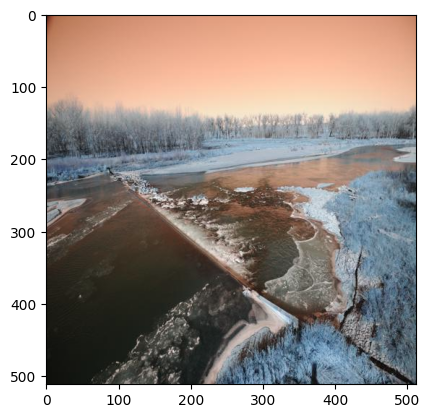

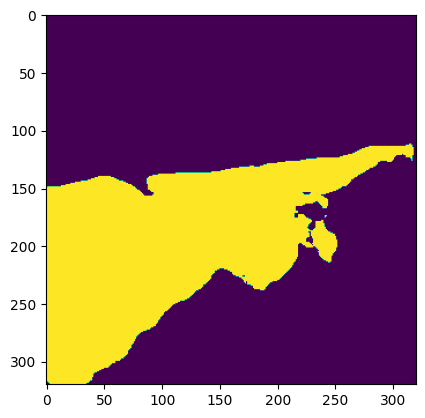

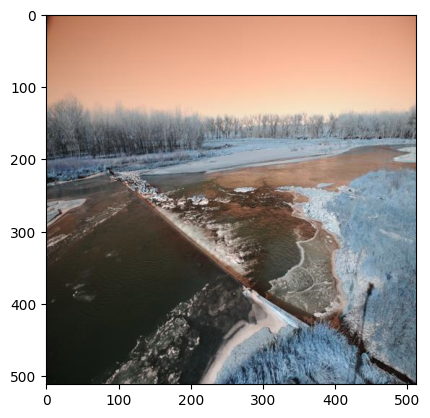

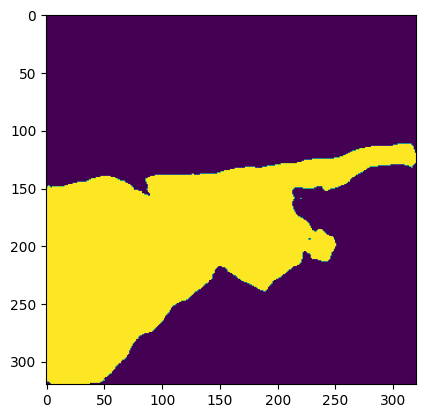

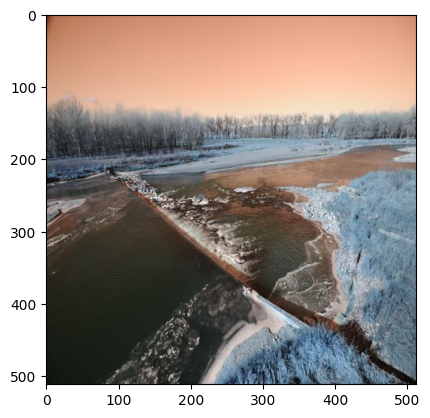

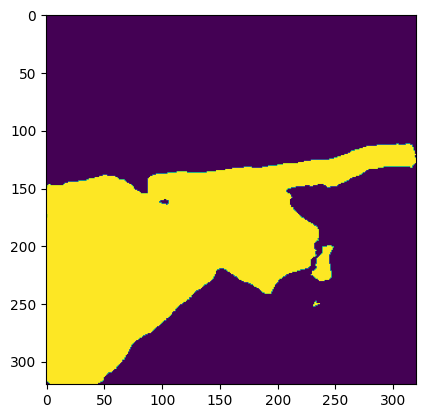

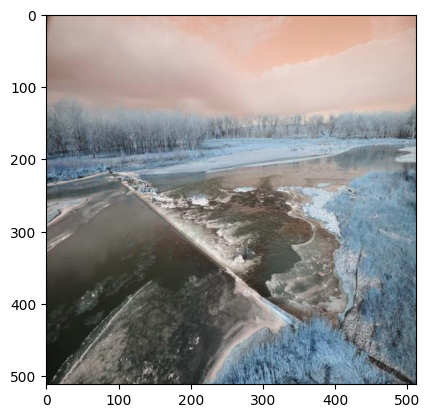

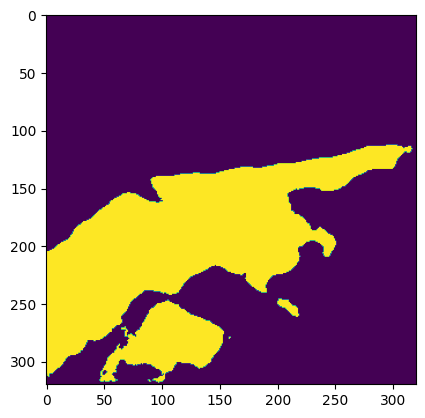

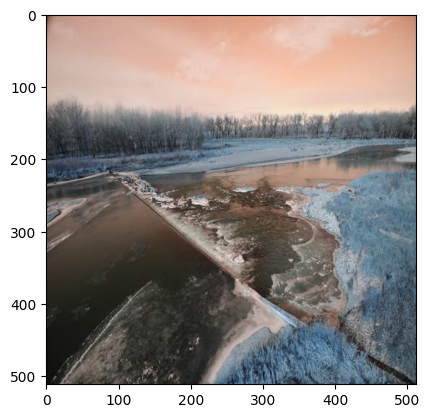

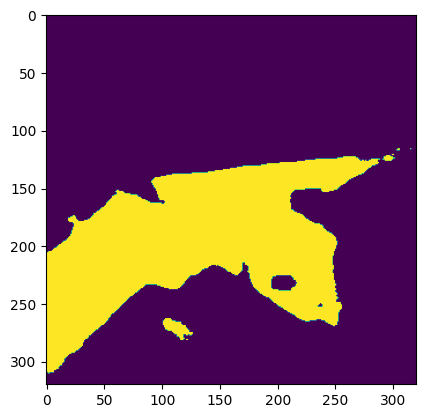

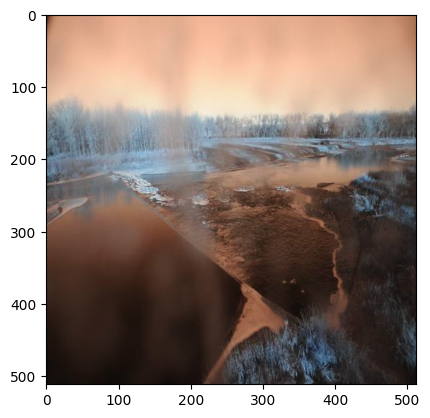

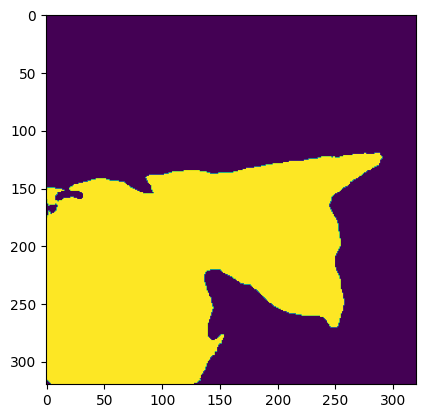

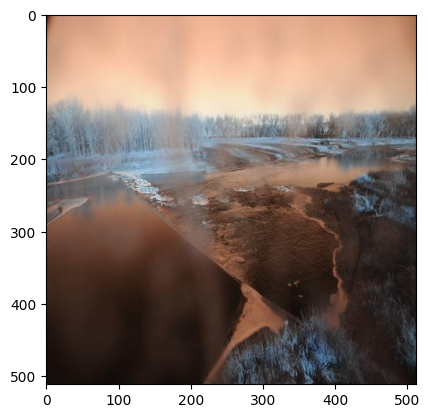

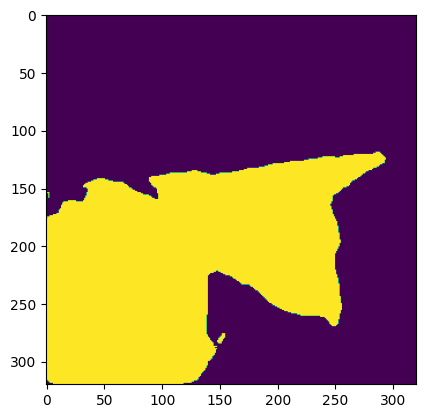

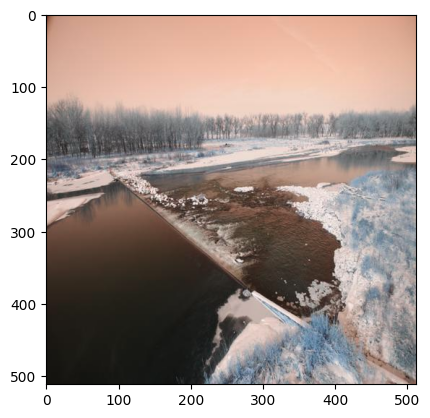

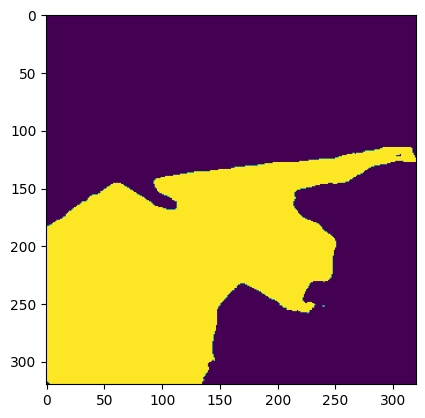

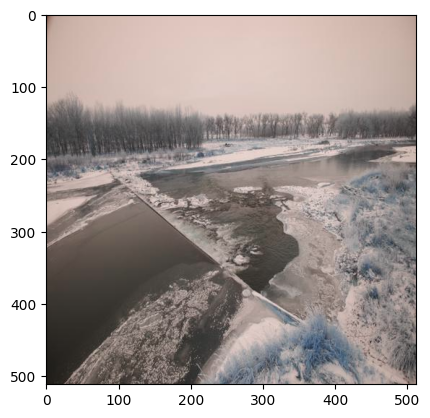

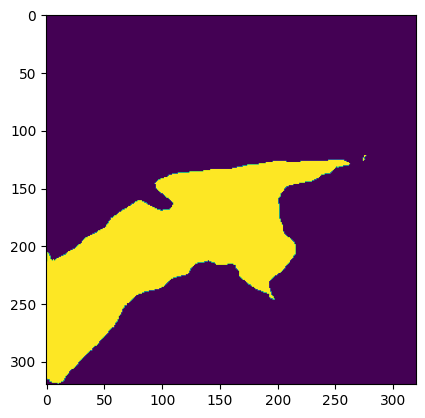

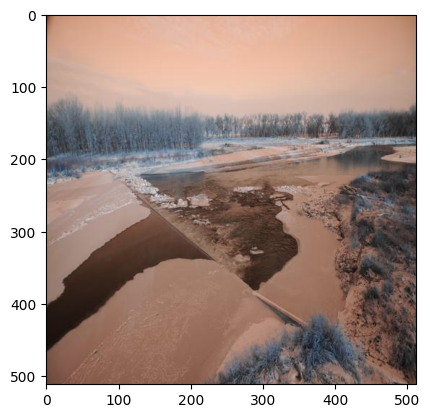

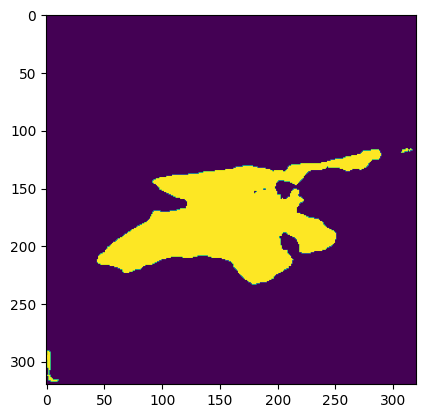

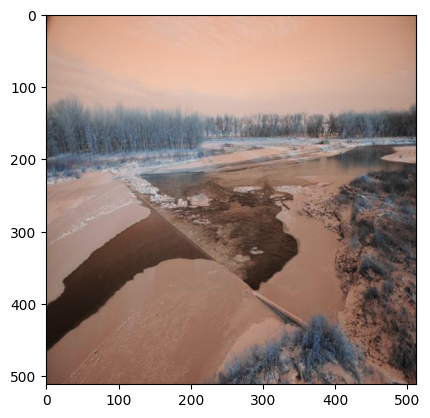

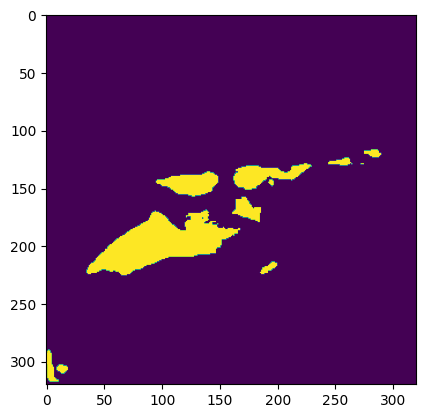

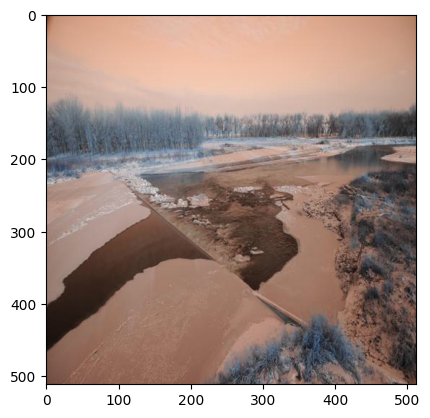

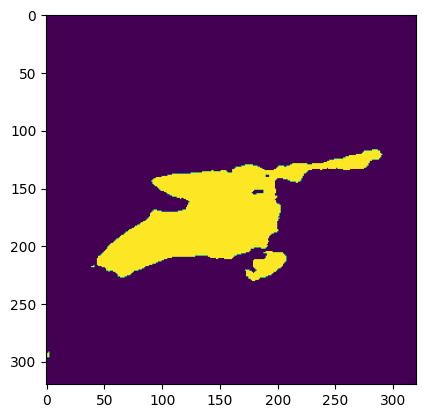

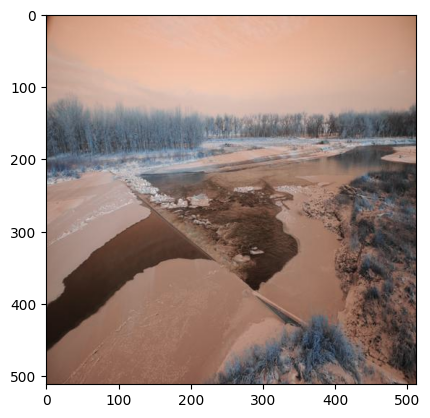

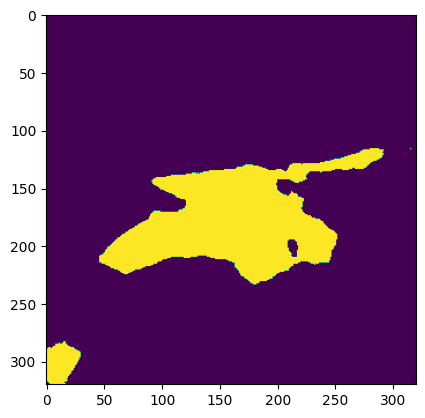

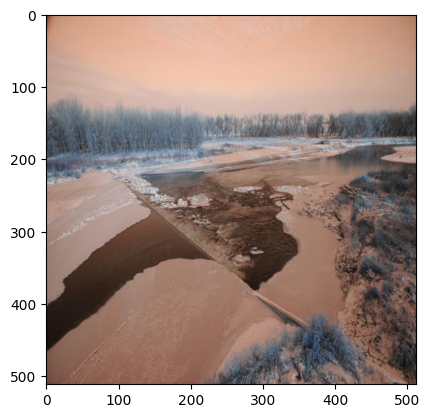

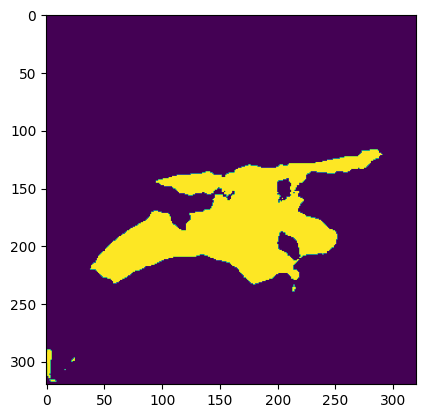

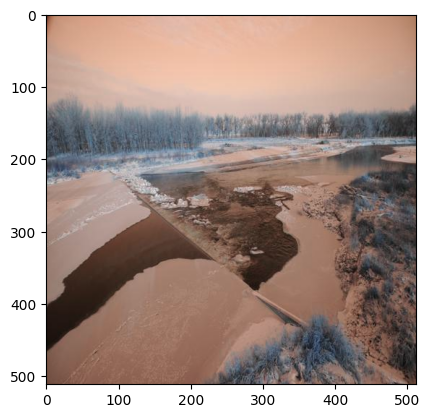

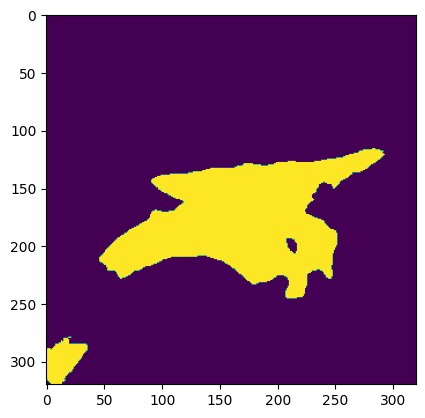

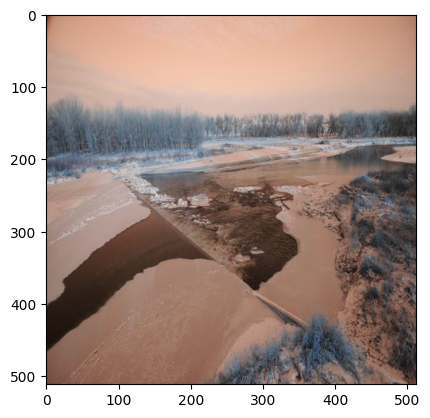

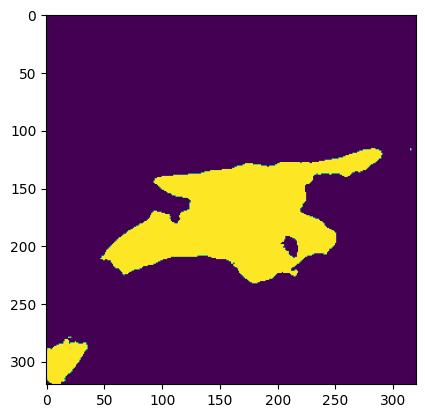

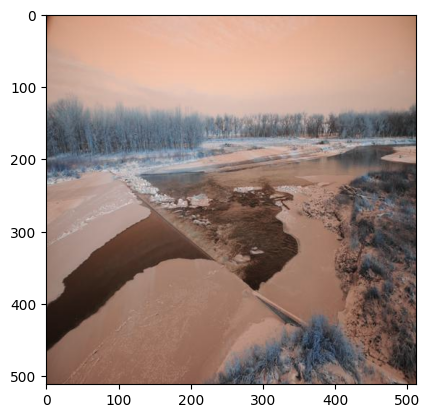

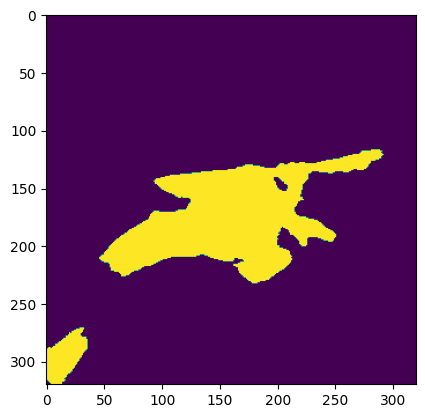

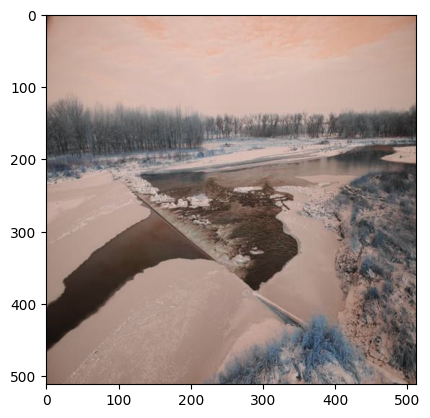

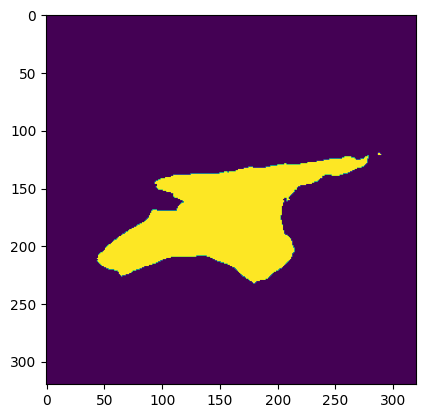

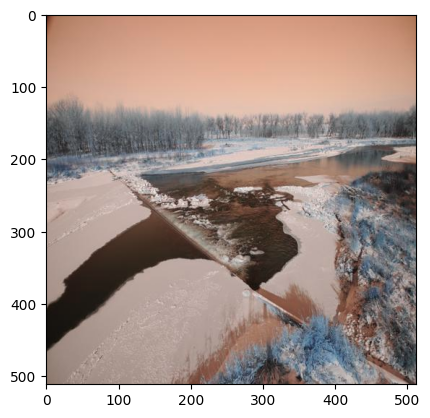

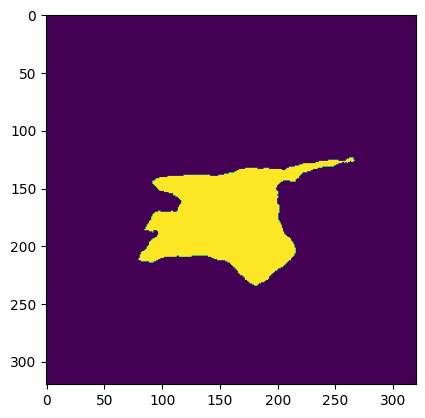

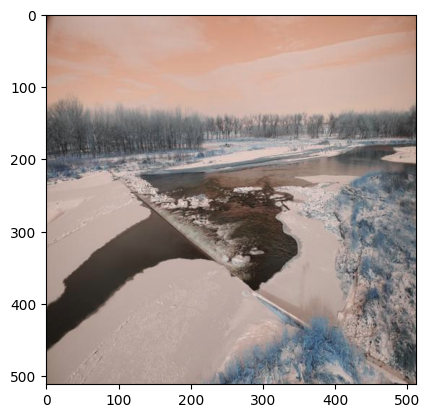

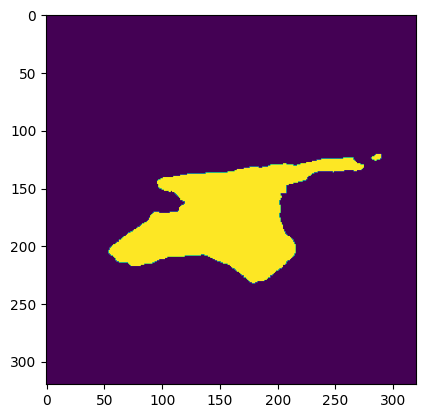

In [190]:
for index, row in df_outliers.head(20).iterrows():
    img = cv2.imread(os.path.join(path_images, row["Filename"]), cv2.COLOR_BGR2RGB)
    mask = cv2.imread(os.path.join(path_masks, row["Filename"].split("/")[-1].rsplit('.', 1)[0] + '.png'), cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.show()
    plt.imshow(mask)
    plt.show()

### Remove photos that were taking with bad illumination based on time

In [191]:
df_time = df[(df.SensorTime.dt.hour >= 8) & (df.SensorTime.dt.hour <= 17)]
df_time = df_time[["Stage", "Discharge", "Month", "RiverArea", "RiverWidth"]]

In [192]:
df_time.shape

(25785, 5)

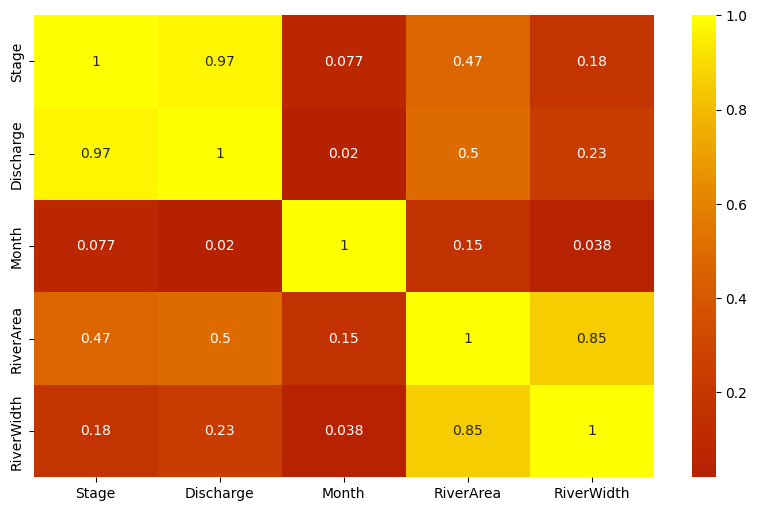

In [193]:
corr_pearson = df_time.corr() # pearson correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_pearson, annot=True, center=0, cmap='gnuplot')
plt.show()

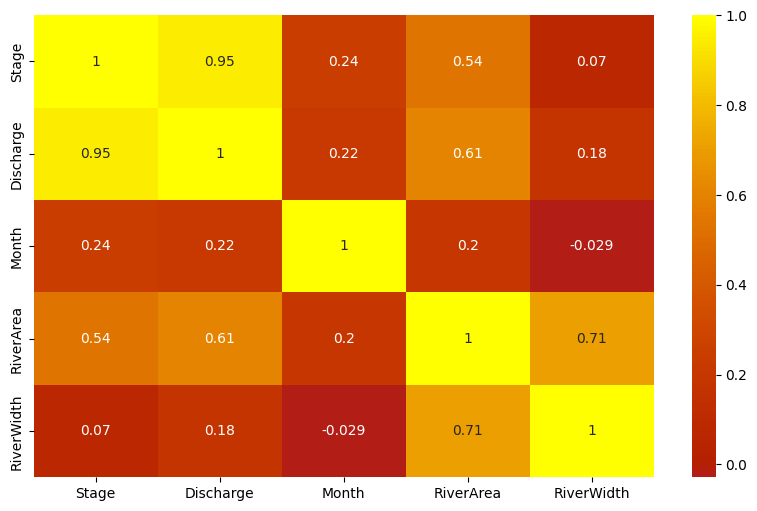

In [194]:
corr_spearman = df_time.corr(method="spearman") # spearman correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman, annot=True, center=0, cmap='gnuplot')
plt.show()

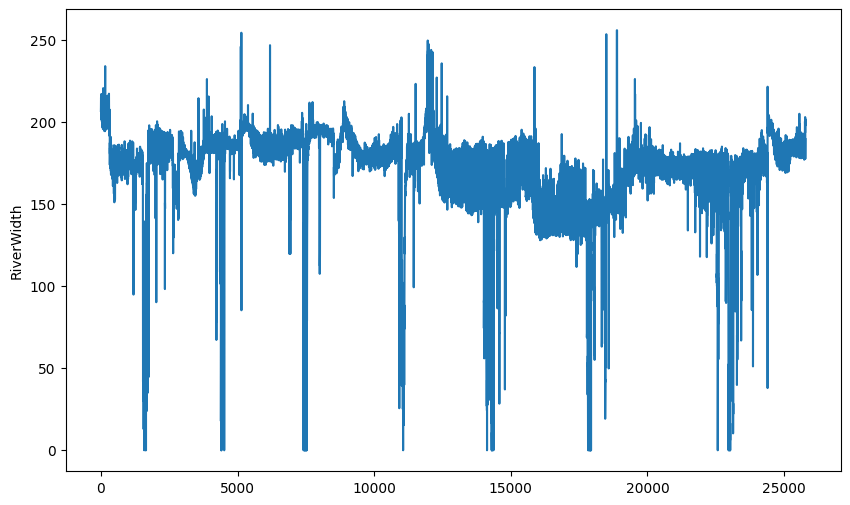

In [195]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_time, x=np.arange(df_time.shape[0]), y="RiverWidth")

plt.show()

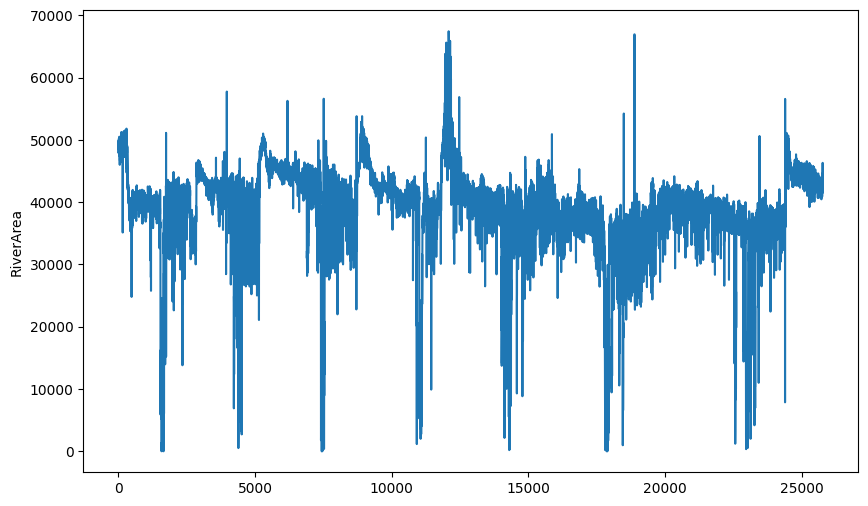

In [196]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_time, x=np.arange(df_time.shape[0]), y="RiverArea")

plt.show()

### Remove winter

In [197]:
df_season = df.copy()
df_season['Year'] = df_season['SensorTime'].dt.year
df_season['Month'] = df_season['SensorTime'].dt.month
df_season['date_offset'] = (df_season.SensorTime.dt.month * 100 + df_season.SensorTime.dt.day - 320) % 1300

df_season['Season'] = pd.cut(df_season['date_offset'], [0, 300, 602, 900, 1300], 
                      labels=['spring', 'summer', 'autumn', 'winter'])

In [198]:
df_season = df_season[df_season['Season'] != "winter"]

In [199]:
df_season = df_season[["Stage", "Discharge", "Month", "RiverArea", "RiverWidth"]]

In [200]:
df_season.shape

(34687, 5)

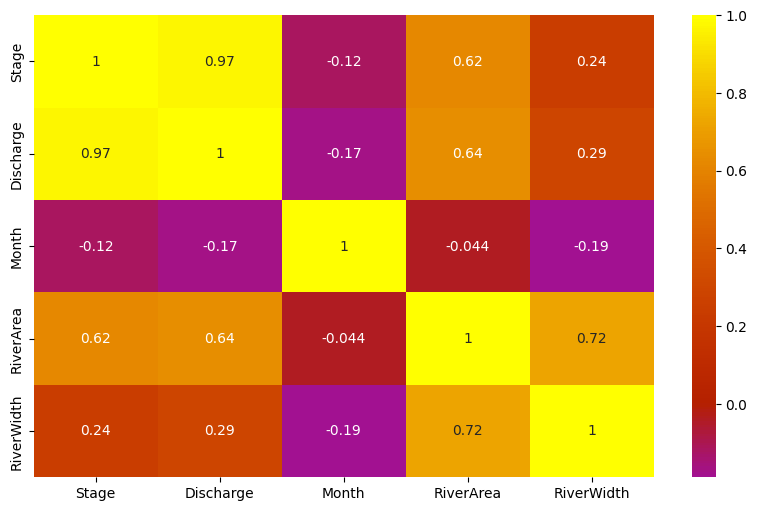

In [201]:
corr_pearson = df_season.corr() # pearson correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_pearson, annot=True, center=0, cmap='gnuplot')
plt.show()

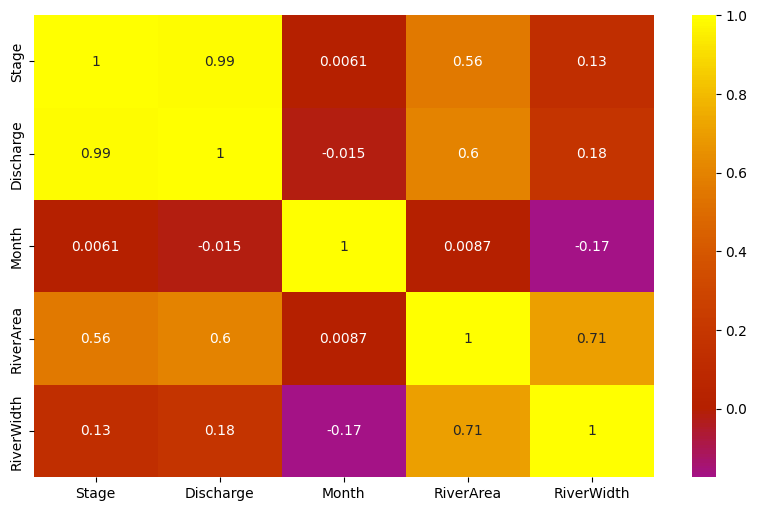

In [202]:
corr_spearman = df_season.corr(method="spearman") # spearman correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman, annot=True, center=0, cmap='gnuplot')
plt.show()

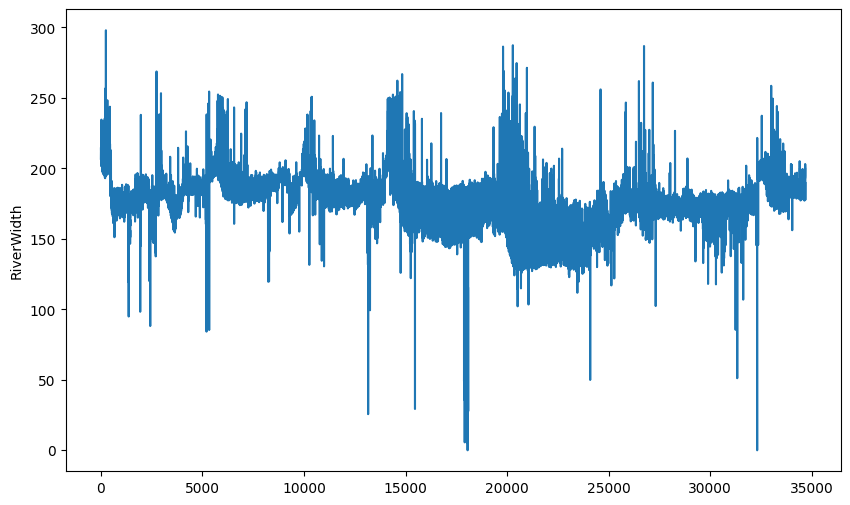

In [203]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_season, x=np.arange(df_season.shape[0]), y="RiverWidth")

plt.show()

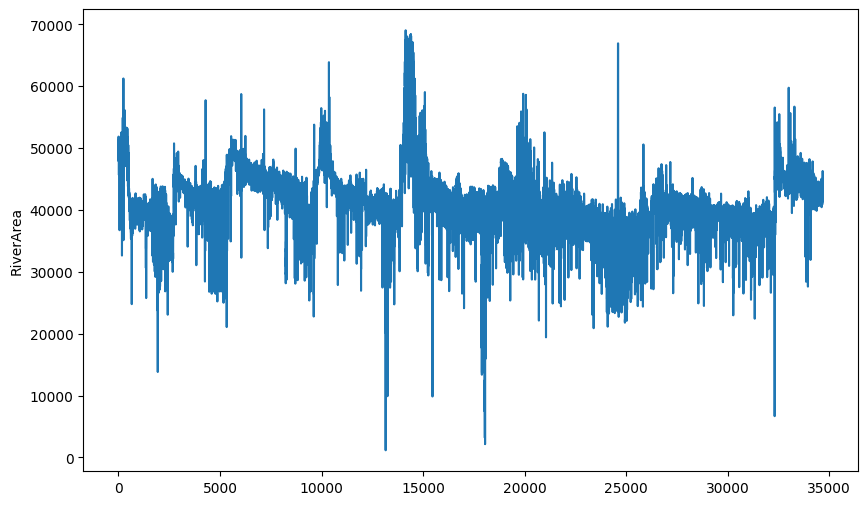

In [204]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_season, x=np.arange(df_season.shape[0]), y="RiverArea")

plt.show()